In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Missing values** 

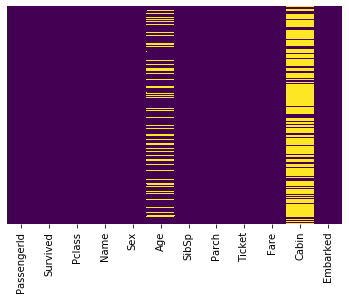

In [9]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap='viridis')

**Analysis on Survive**

In [13]:
sns.set_style('whitegrid')

classification on basis of sex

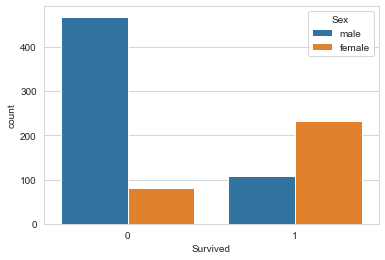

In [14]:
sns.countplot(x='Survived',hue='Sex' ,data=train)

classification on basis of Passenger class

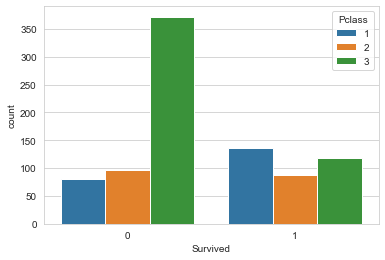

In [16]:
sns.countplot(x='Survived',hue='Pclass' ,data=train)

classification on basis of Age

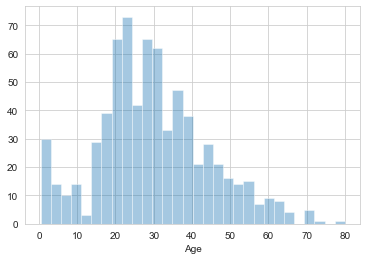

In [20]:
sns.distplot(train['Age'].dropna(),kde=False, bins =30)

**Import cufflinks for plot**

In [15]:
import cufflinks as cf

In [16]:
cf.go_offline()

In [12]:
train['Fare'].iplot(kind='hist',bins=30)

## DATA CLEANING

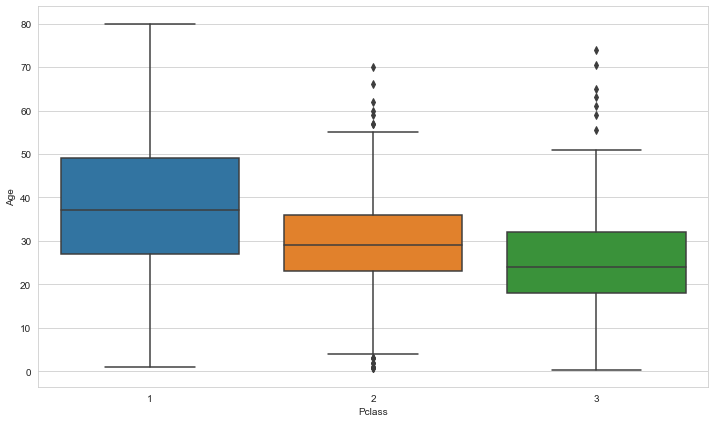

In [21]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age',data=train)

In [23]:
def impute_age(cols):
    Age= cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass ==3:
            return 24
    else:
        return Age

In [28]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

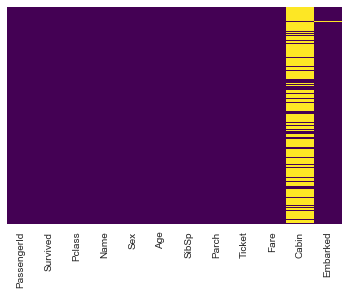

In [29]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [30]:
train.drop('Cabin',axis=1,inplace=True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S


In [32]:
train.dropna(inplace=True)

**Now we don't have missing data**

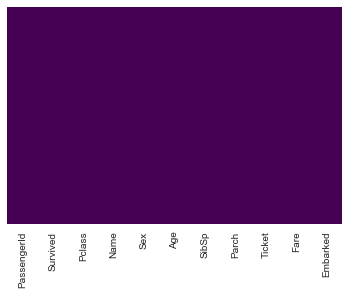

In [33]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

## Converting Categorical features

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    int64  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 83.3+ KB


In [35]:
sex= pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [37]:
train.drop(['Sex','Embarked','Ticket','Name'],axis=1, inplace=True)

In [38]:
train =pd.concat([train,sex,embark],axis=1)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24,1,0,7.2500,1,0,1
1,2,1,1,37,1,0,71.2833,0,0,0
2,3,1,3,24,0,0,7.9250,0,0,1
3,4,1,1,37,1,0,53.1000,0,0,1
4,5,0,3,24,0,0,8.0500,1,0,1


## Building logistic Regression model

**Train test spilt**

y is dependent variable
x is features(Independent variable)

In [45]:
X= train.drop('Survived',axis=1)
y= train['Survived']

In [43]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Training and  Predicting**

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logmodel = LogisticRegression()

In [50]:
logmodel.fit(X_train,y_train)

C:\Users\S.N sinha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
predctions = logmodel.predict(X_test)

**Evaluations**

In [53]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,predctions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(y_test,predctions)

array([[151,  12],
       [ 36,  68]], dtype=int64)